In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

RANDOM_STATE = 55

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.shape

(918, 12)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

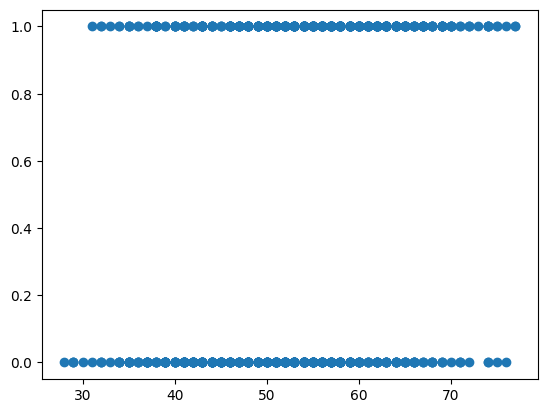

In [20]:
plt.plot(df["Age"],  df["HeartDisease"], 'o',)

### ONEHOT ENCODING USING PANDAS

In [21]:
categorical_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [22]:
df1 = pd.get_dummies(df, prefix= categorical_variables, columns=categorical_variables)

In [23]:
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [24]:
features = [x for x in df1.columns if x not in 'HeartDisease']

In [51]:
df1['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [53]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [52]:
df1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [58]:
# set datastructure to store d=feature names?
search = {"Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"}

In [59]:
for i in features:
    print(i)
    if((i in search) == False):
       print(df1[i].value_counts())
    print('-----------------------')

Age
-----------------------
RestingBP
-----------------------
Cholesterol
-----------------------
FastingBS
-----------------------
MaxHR
-----------------------
Oldpeak
-----------------------
Sex_F
Sex_F
False    725
True     193
Name: count, dtype: int64
-----------------------
Sex_M
Sex_M
True     725
False    193
Name: count, dtype: int64
-----------------------
ChestPainType_ASY
ChestPainType_ASY
True     496
False    422
Name: count, dtype: int64
-----------------------
ChestPainType_ATA
ChestPainType_ATA
False    745
True     173
Name: count, dtype: int64
-----------------------
ChestPainType_NAP
ChestPainType_NAP
False    715
True     203
Name: count, dtype: int64
-----------------------
ChestPainType_TA
ChestPainType_TA
False    872
True      46
Name: count, dtype: int64
-----------------------
RestingECG_LVH
RestingECG_LVH
False    730
True     188
Name: count, dtype: int64
-----------------------
RestingECG_Normal
RestingECG_Normal
True     552
False    366
Name: count, dty

In [27]:
print(len(features))

20


### Splitting the dataset

In [32]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 55

In [33]:
X_train, X_val, y_train, y_val = train_test_split(df1[features], df1['HeartDisease'], train_size=0.8, random_state= RANDOM_STATE)

In [35]:
print(f'Train Samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {(sum(y_train)/len(y_train)):.4f}')

Train Samples: 734
validation samples: 184
target proportion: 0.5518


### Building The Models

### 1. DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.metrics import accuracy_score

In [40]:
min_samples_split_list = [2, 10, 30, 100, 200, 300, 700]
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

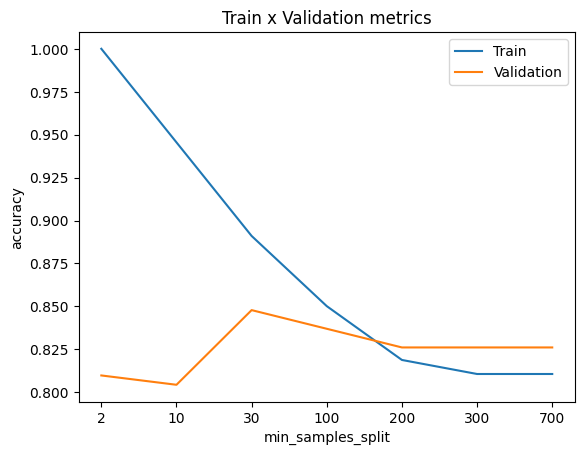

In [43]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train, label='train')
plt.plot(accuracy_list_val, label='validation')
plt.legend(['Train', 'Validation'])

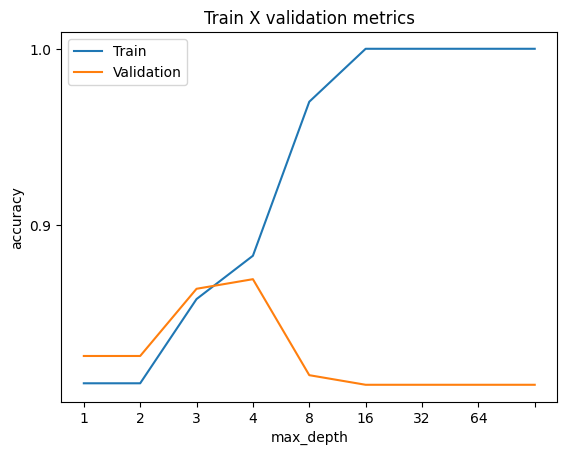

In [44]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train X validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

In [66]:
decision_tree_model = DecisionTreeClassifier(min_samples_split= 50, max_depth=3, random_state=RANDOM_STATE).fit(X_train, y_train)

In [67]:
print(f"Metrics train: Accuracy Score:{accuracy_score(decision_tree_model.predict(X_train), y_train):.4f}")
print(f"Metrics val: Accuracy Score:{accuracy_score(decision_tree_model.predict(X_val), y_val):.4f}")

Metrics train: Accuracy Score:0.8583
Metrics val: Accuracy Score:0.8641


### 2.RANDOM FOREST

In [68]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  
                                            
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

In [69]:
from sklearn.ensemble import RandomForestClassifier

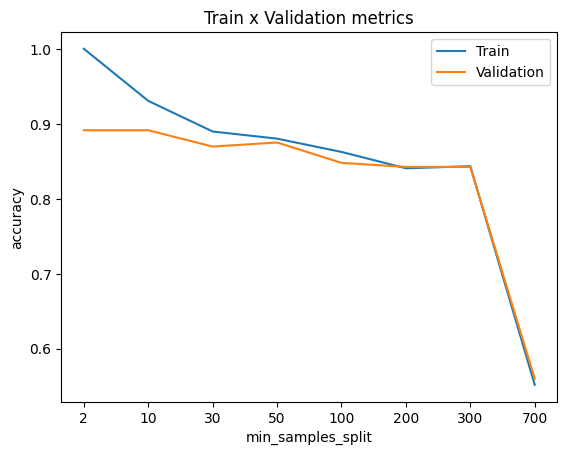

In [72]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split= min_samples_split, random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

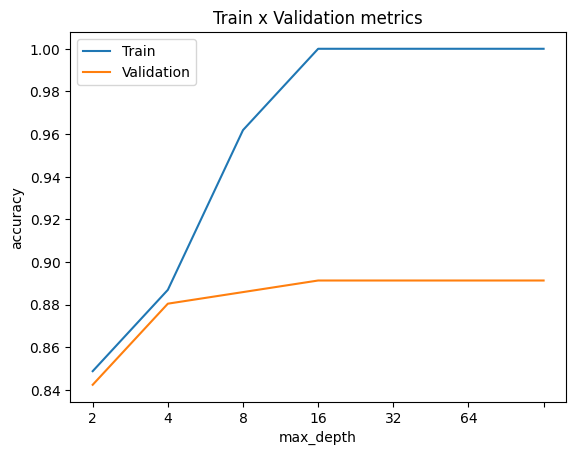

In [73]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

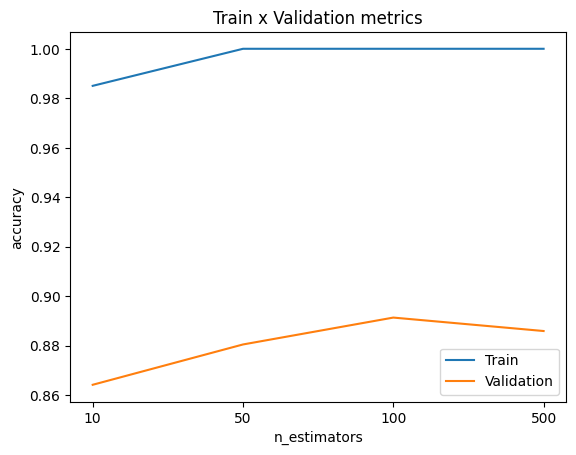

In [74]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [75]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=10).fit(X_train, y_train)

In [77]:
random_forest_model

RandomForestClassifier(max_depth=16, min_samples_split=10)

In [78]:
print(f"Metrics train: Accuracy Score:{accuracy_score(random_forest_model.predict(X_train), y_train):.4f}")

Metrics train: Accuracy Score:0.9346


### 3.XGBOOST

In [79]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [80]:
X_train_fit.shape

(587, 20)

In [81]:
X_train.shape

(734, 20)

In [84]:
from xgboost import XGBClassifier

In [95]:
xgb_model = XGBClassifier(n_estimators = 11, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=11, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [96]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9155
Metrics test:
	Accuracy score: 0.8478
